# Importing data

In [114]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
from MiscFuncs import df_stats, get_concat_h
import CorrFuncs as cf
import os
import scipy.stats as st

In [35]:
path_x = r'C:\Users\Adamin\Documents\Alpha'
path = r'/vol/sci/astro/bigdata/tussbaum/halofinder/catalog/'
path_1 = r'/vol/sci/astro/home/adambeilialpha/'
sgal_qlabel_0 = pd.read_pickle(path_1 + r'/sgal_qlabel_0.pkl')
sgal_qlabel_1 = pd.read_pickle(path_1 + r'/sgal_qlabel_1.pkl')
sgal_features = pd.concat([sgal_qlabel_0, sgal_qlabel_1], axis=1)
sgal_qlabel_2 = pd.read_pickle(path_1 + r'/sgal_qlabel_2.pkl')
sgal_qlabel_3 = pd.read_pickle(path_1 + r'/sgal_qlabel_3.pkl')
sgal_qlabel_4 = pd.read_pickle(path_1 + r'/sgal_qlabel_4.pkl')
#Re-import
#sgal_qlabel_5 = pd.read_pickle(path_1 + r'/sgal_qlabel_5.pkl')

In [31]:
sgal_qlabel_118_596 = pd.read_pickle(path_1 + r'/sgal_qlabel.pkl')
sgal_forces = pd.DataFrame(index=sgal_qlabel_0.index)
sgal_forces[['Fgrav','Pgrav','Ptidal','gas_phase_metallicity(disc)[log(O/H)+12]']]=sgal_qlabel_118_596[['Fgrav','Pgrav','Ptidal','gas_phase_metallicity(disc)[log(O/H)+12]']]

In [32]:
sgal_qlabel_all = pd.concat([sgal_qlabel_0, sgal_qlabel_1,sgal_qlabel_2, sgal_qlabel_3,sgal_qlabel_4,sgal_qlabel_5], axis=1)

In [ ]:
df_stats(sgal_qlabel_118_596)

In [ ]:
df_stats(sgal_qlabel_all)

### Histograms: OG vs Normalized

In [ ]:
a=np.log(sgal_qlabel_all['Mtot(Rsat)[Msun]'].fillna(1.0).astype(float))
b=sgal_qlabel_all['Mtot(Rsat)[Msun]'].fillna(0.)

print sns.distplot(a)
plt.figure()
print sns.distplot(b)

In [ ]:
cf.HistCorrelation(sgal_qlabel_all,'Mcg(Rcoldgass_0.9)[Msun]', 'Mcg(Rsat)[Msun]','Mcg')

In [ ]:
sgal_qlabel_normalized = cf.df_normed(sgal_qlabel_0)

# Pearson Correlation Graph

91
qlabel                          1.000000
Eccentricity(Rperi_1,Rapo_1)   -0.472231
Msat/Mrvir                      0.467140
Rsat[kpc]                       0.386597
Name: qlabel, dtype: float64


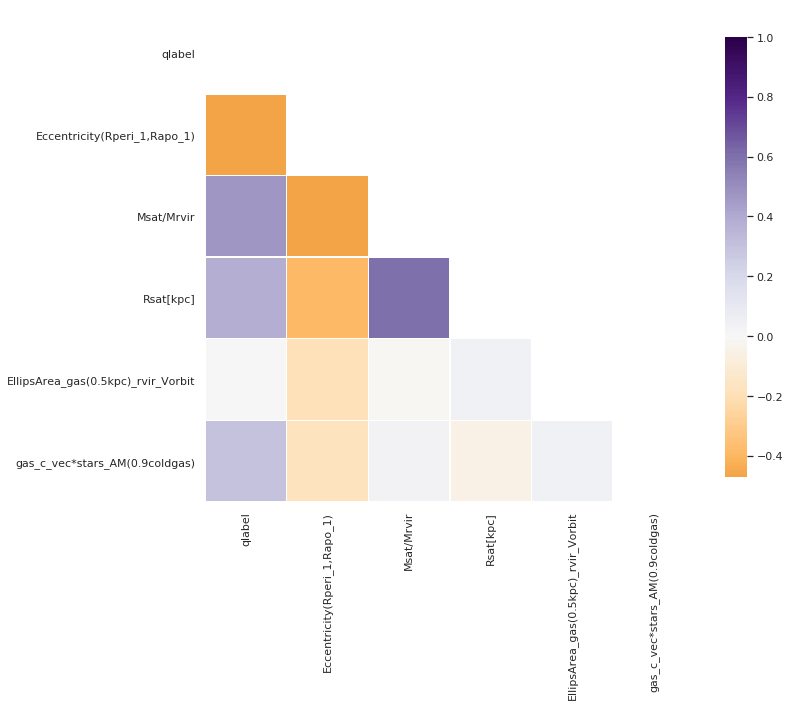

In [101]:
sgal_df = pd.concat([sgal_qlabel_all,sgal_forces],axis=1)
selected_features = ['qlabel','Eccentricity(Rperi_1,Rapo_1)','Msat/Mrvir','Rsat[kpc]','EllipsArea_gas(0.5kpc)_rvir_Vorbit',
                   'gas_c_vec*stars_AM(0.9coldgas)']
sgal_df = sgal_df.loc[sgal_df['qlabel']!=0]
sgal_df.qlabel = sgal_qlabel_all.qlabel.map({1:0,4:10,3:5})
cf.PearsonCorr(sgal_df[selected_features])


In [148]:
reload(cf)

<module 'CorrFuncs' from 'CorrFuncs.pyc'>

<Figure size 432x288 with 0 Axes>

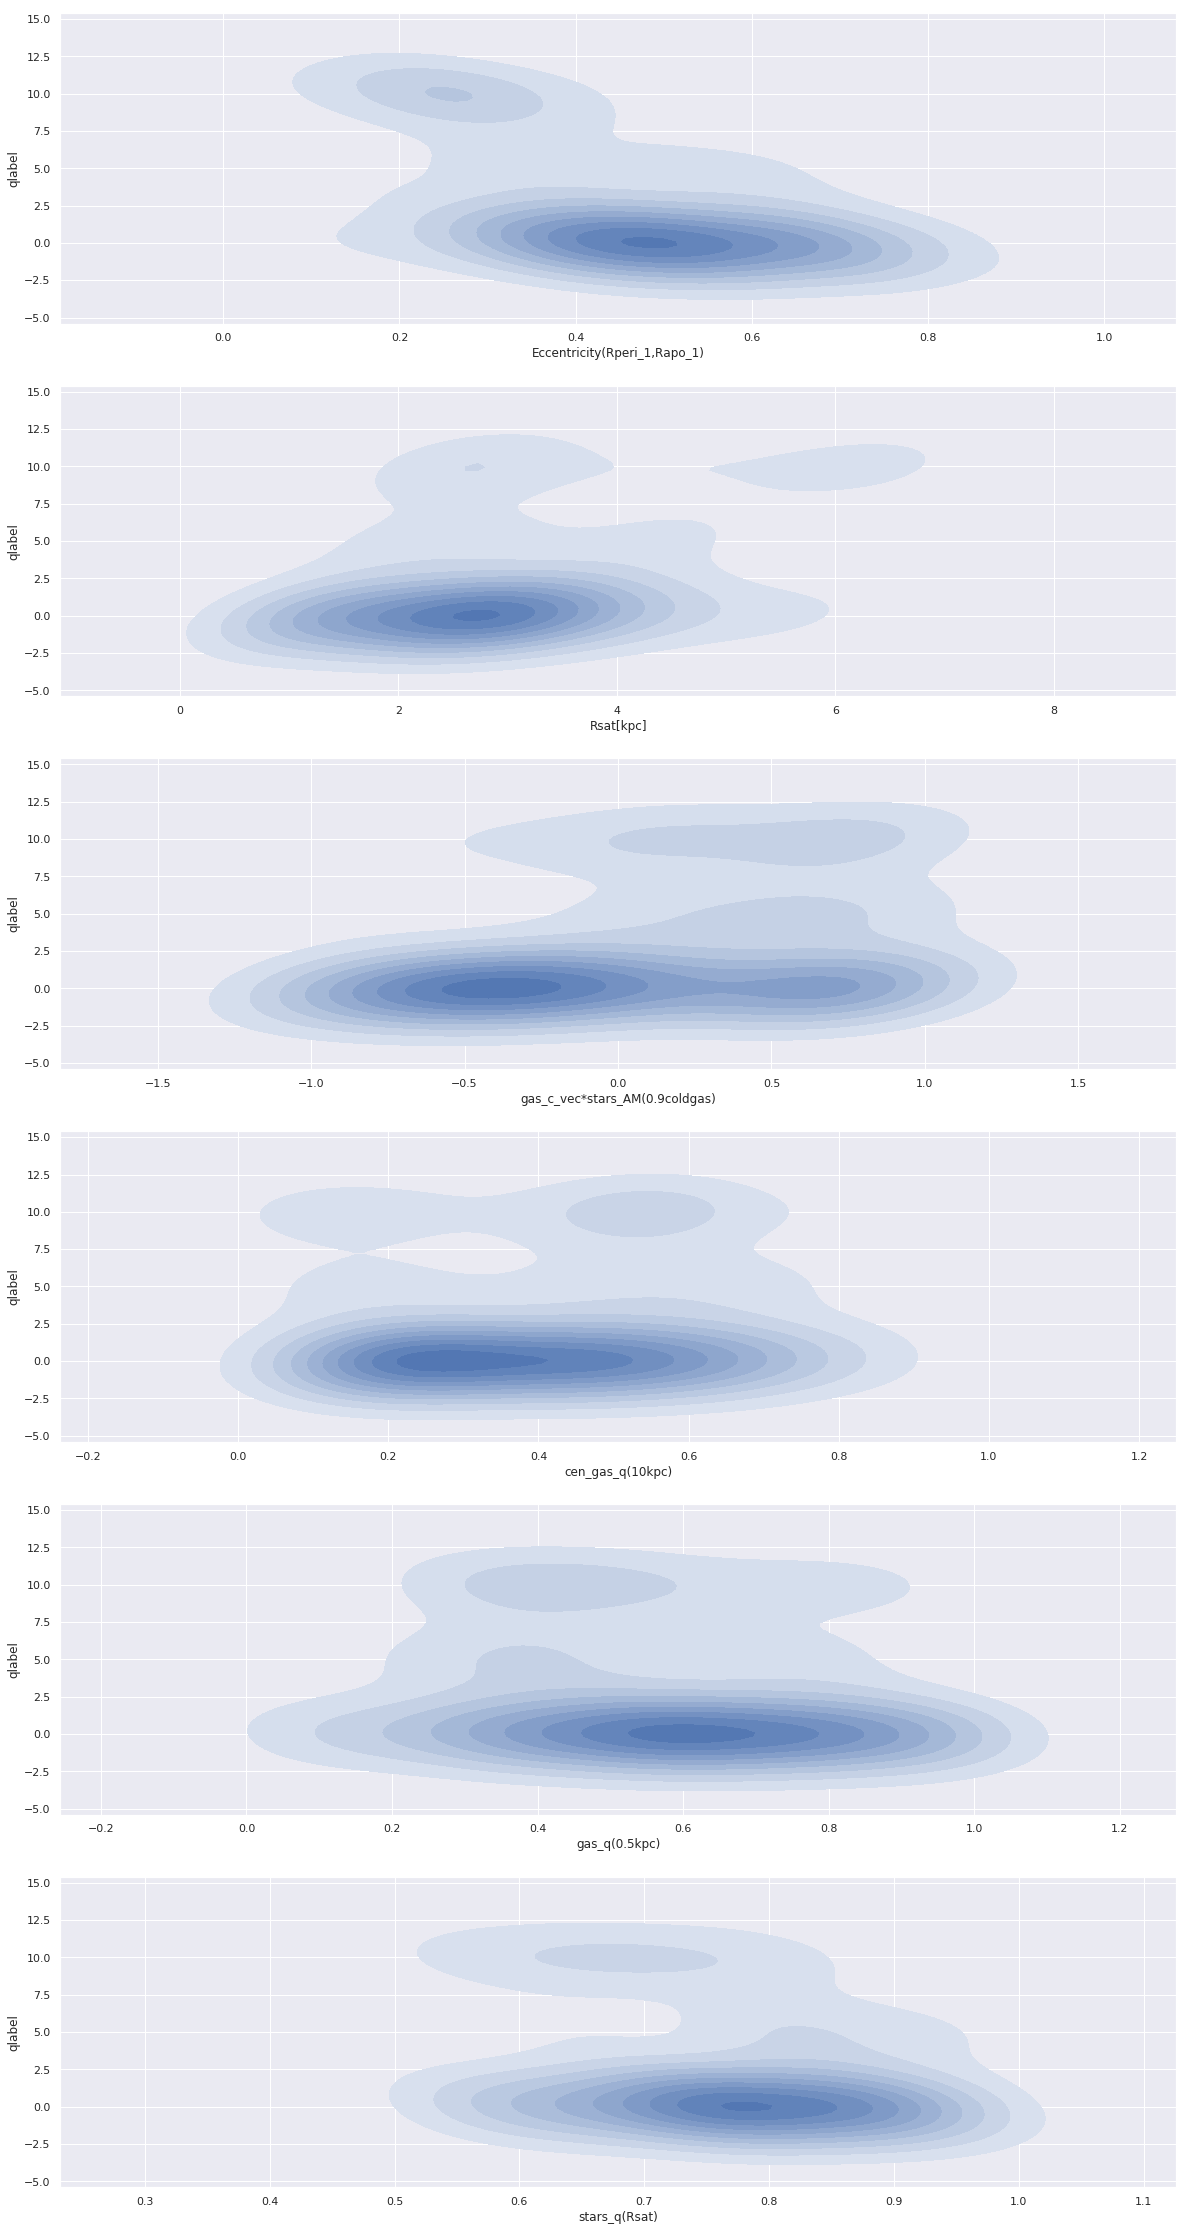

In [145]:
features_reg = ['qlabel','Eccentricity(Rperi_1,Rapo_1)','Rsat[kpc]',
                'gas_c_vec*stars_AM(0.9coldgas)','cen_gas_q(10kpc)','gas_q(0.5kpc)','stars_q(Rsat)']
sgal_features = sgal_df[features_reg]
cf.CorrDensityPlots(sgal_features,40)

<Figure size 432x288 with 0 Axes>

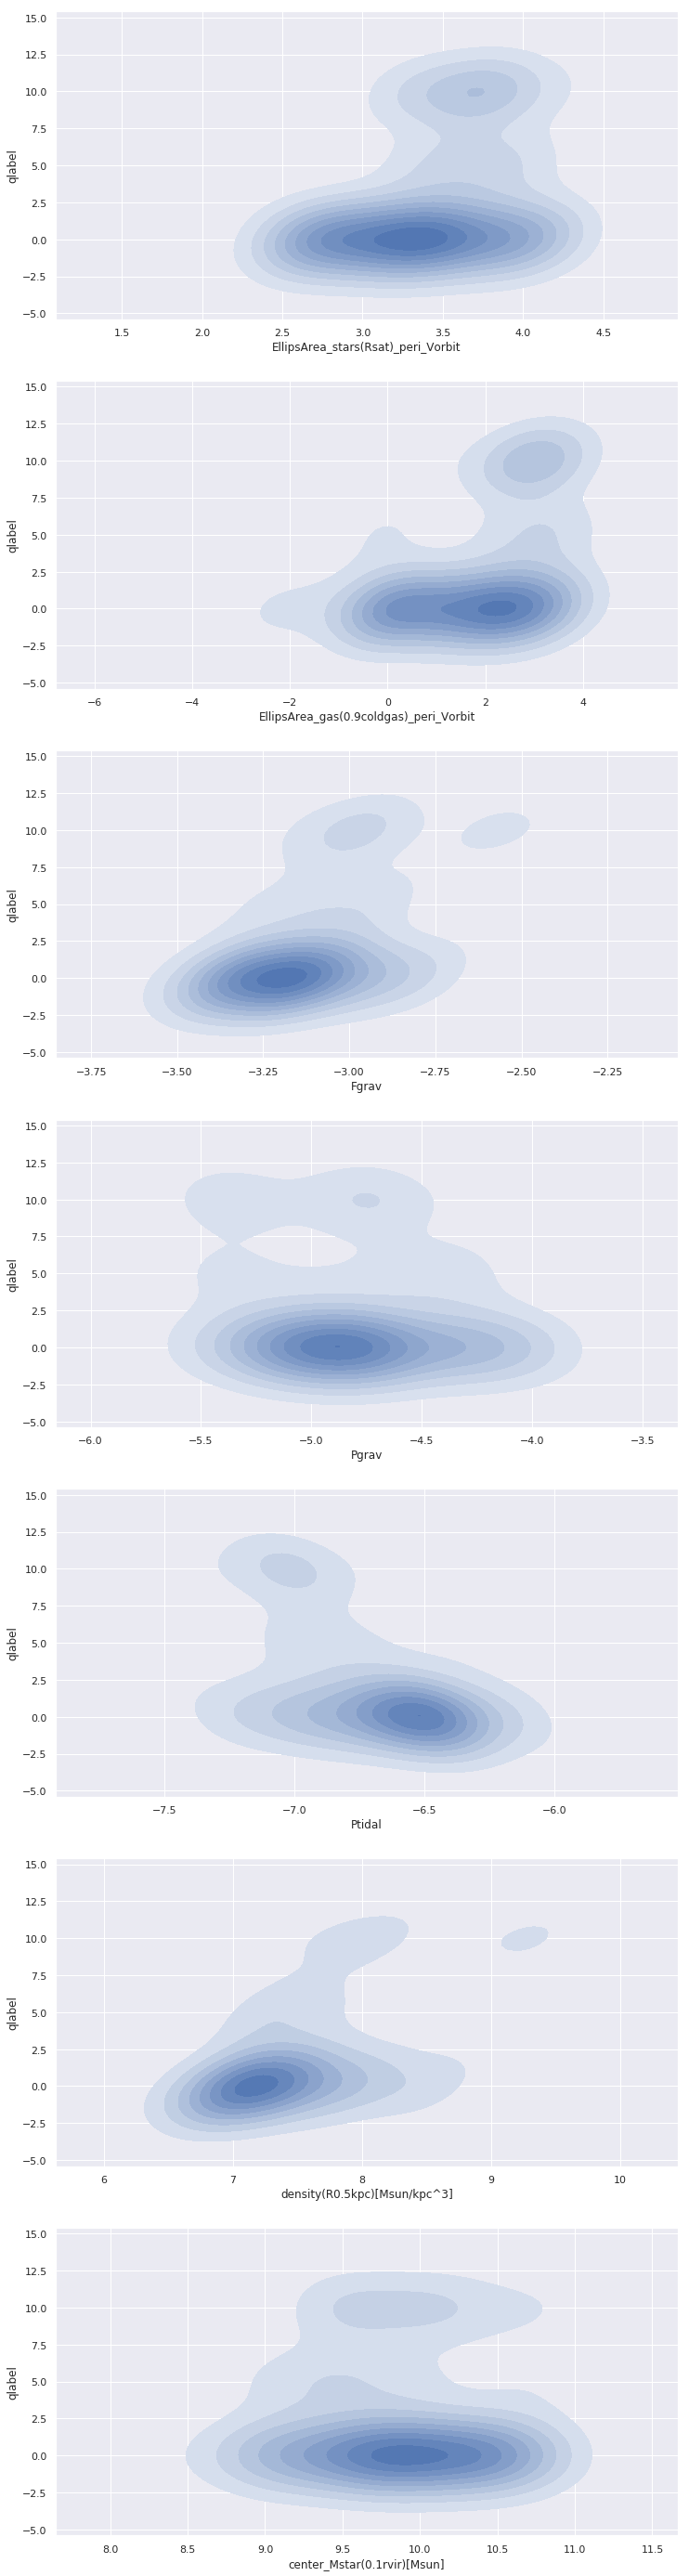

In [152]:
features_normed = ['qlabel','EllipsArea_stars(Rsat)_peri_Vorbit','EllipsArea_gas(0.9coldgas)_peri_Vorbit',
                  'Fgrav','Pgrav','Ptidal','density(R0.5kpc)[Msun/kpc^3]','center_Mstar(0.1rvir)[Msun]']
sgal_features = sgal_df[features_normed]
cf.CorrDensityPlots_normed(sgal_features,50)

In [ ]:
check fig 413 in tomers paper

### Reg:
#### From sgal_features (sgal_qlabel_0 + 1)
stars_AM*Vorbit(0.9coldgas)      sgal_qlabel_0      |    
gas_q(0.5kpc)    sgal_qlabel_1     |    
EllipsDepth_gas(0.5kpc) peri_Vorbit     sgal_qlabel_1     |    
#### From (sgal_qlabel_4+3+2)
cen_gas_q(10kpc)   |    
gas_q(1kpc)    |

### Normalized: 
#### From sgal_features (sgal_qlabel_0 + 1)
Rorbit (slight)     |
center_Msat(0.1rvir)[Msun] / center_Rvir[kpc]     |    
Rorbit(peri_1/R_vir[kpc]     |    
density(R0.5kpc)[Msun/kpc^3] (slight)     |    
zana_r     |    
stars_q(Rsat)     |    
EllipsArea_gas(0.9coldgas)_peri_Vorbit     |    
EllipsArea_stars(Rsat)_peri_Vorbit     |    
EllipsArea_gas(0.5kpc)_rvir_VorbitSquared     |    

#### From (sgal_qlabel_4+3+2)
SFR(R_disc)[Msun/yr]     |    
density(Rcoldass_0.9)[Msun/kpc^3]     |    
Mdm(rvir)[Msun]     |    
Mcold_gas(0.15rvir)[Msun]     |    

#### From sgal_forces
gas_phase_metallicity(disc)[log(O/H)+l2]     |    
Fgrav     |    
Pgrav     |    
Ptidal     |    

## After Normalization

In [156]:
labels = ['qlabel','Eccentricity(Rperi_1,Rapo_1)','Msat/Mrvir','Rsat[kpc]','EllipsArea_gas(0.5kpc)_rvir_Vorbit',
        'gas_c_vec*stars_AM(0.9coldgas)','EllipsArea_gas(0.9coldgas)_peri_Vorbit','EllipsArea_stars(Rsat)_peri_Vorbit','EllipsArea_gas(0.5kpc)_rvir_VorbitSquared']
sgal_df_normalized = cf.df_normed(sgal_df[labels])

91
qlabel                          1.000000
Eccentricity(Rperi_1,Rapo_1)   -0.468338
Msat/Mrvir                      0.445694
Rsat[kpc]                       0.358701
Name: qlabel, dtype: float64


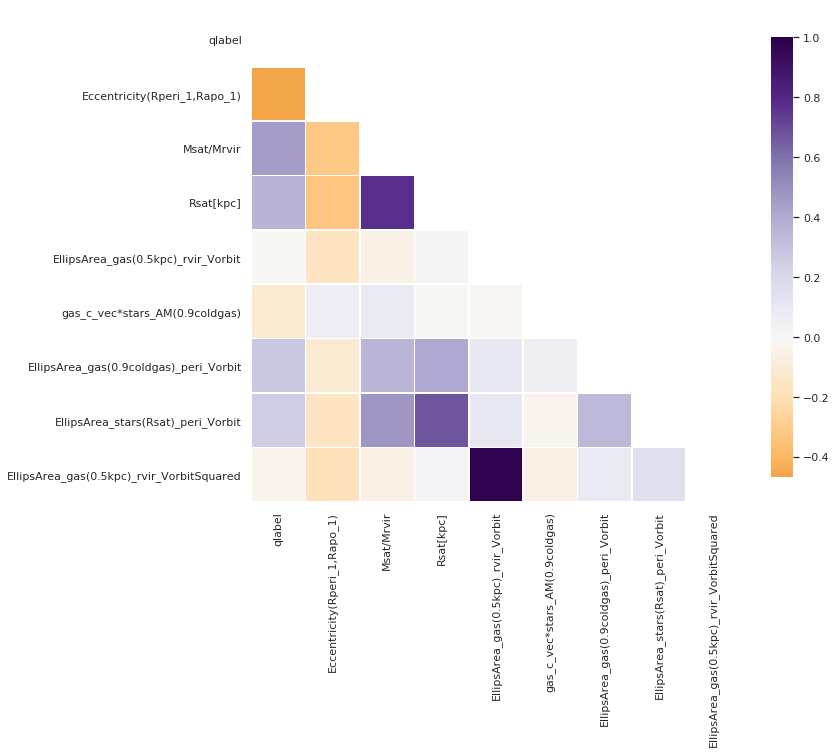

In [157]:
cf.PearsonCorr(sgal_df_normalized)